**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   NOMBRE: ---------EMILY ANN SEDÁN HERRERA---------------
*   MATRÍCULA: ---A01795443------------------------

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/Ciencia_Datos/Actividad7/"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe.

In [5]:
## Obtenemos la información del DataFrame
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


In [6]:
# Identificamos estadísticas descriptivas para variables numéricas
cereals_df.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,76.0,14.802632,3.907326,5.000000,12.000000,14.500000,17.000000,23.000000
sugars,76.0,7.026316,4.378656,0.000000,3.000000,7.000000,11.000000,15.000000
potass,75.0,98.666667,70.410636,15.000000,42.500000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


In [7]:
# Identificamos características descriptivas para variables categóricas, tendencia y cardinalidad:
cereals_df.describe(include = 'object').T

,count,unique,top,freq
name,77,77,100%_Bran,1
mfr,77,7,K,23
type,77,2,C,74


In [8]:
# Previo a realizar gráficos, identificamos la cantidad de variables unicos por variables
cereals_df.nunique()

name        77
mfr          7
type         2
calories    11
protein      6
fat          5
sodium      27
fiber       13
carbo       21
sugars      16
potass      35
vitamins     3
shelf        3
weight       7
cups        12
rating      77
dtype: int64

<ipython-input-9-09dc531c099b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='mfr', data=cereals_df,palette = "tab10")


<Axes: xlabel='mfr', ylabel='count'>

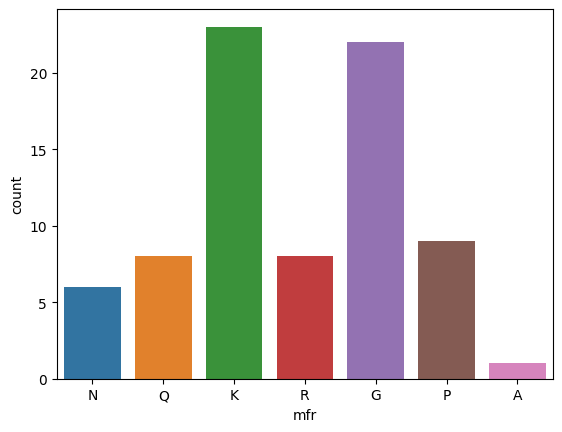

In [9]:
## Gráfico de barras para conocer la cantidad por cada fabricante de cereales, variable mfr:
sns.countplot(x='mfr', data=cereals_df,palette = "tab10")

<ipython-input-10-b352b51a1ac4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=cereals_df,palette = "mako")


<Axes: xlabel='type', ylabel='count'>

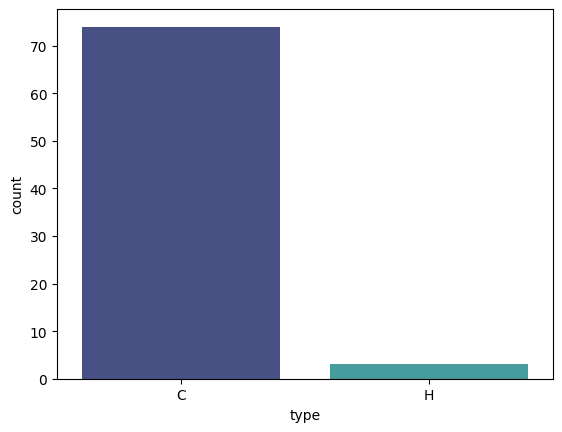

In [10]:
## Gráfico de barras para conocer la cantidad por cada tipo de cereales, variable type:
sns.countplot(x='type', data=cereals_df,palette = "mako")

<ipython-input-11-8659048191db>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=cereals_df[col],color='grey', ax=ax, bins=10,palette="bright",linewidth=2) # ---> Seaborn
<ipython-input-11-8659048191db>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=cereals_df[col],color='grey', ax=ax, bins=10,palette="bright",linewidth=2) # ---> Seaborn
<ipython-input-11-8659048191db>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=cereals_df[col],color='grey', ax=ax, bins=10,palette="bright",linewidth=2) # ---> Seaborn
<ipython-input-11-8659048191db>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=cereals_df[col],color='grey', ax=ax, bins=10,palette="bright",linewidth=2) # ---> Seaborn


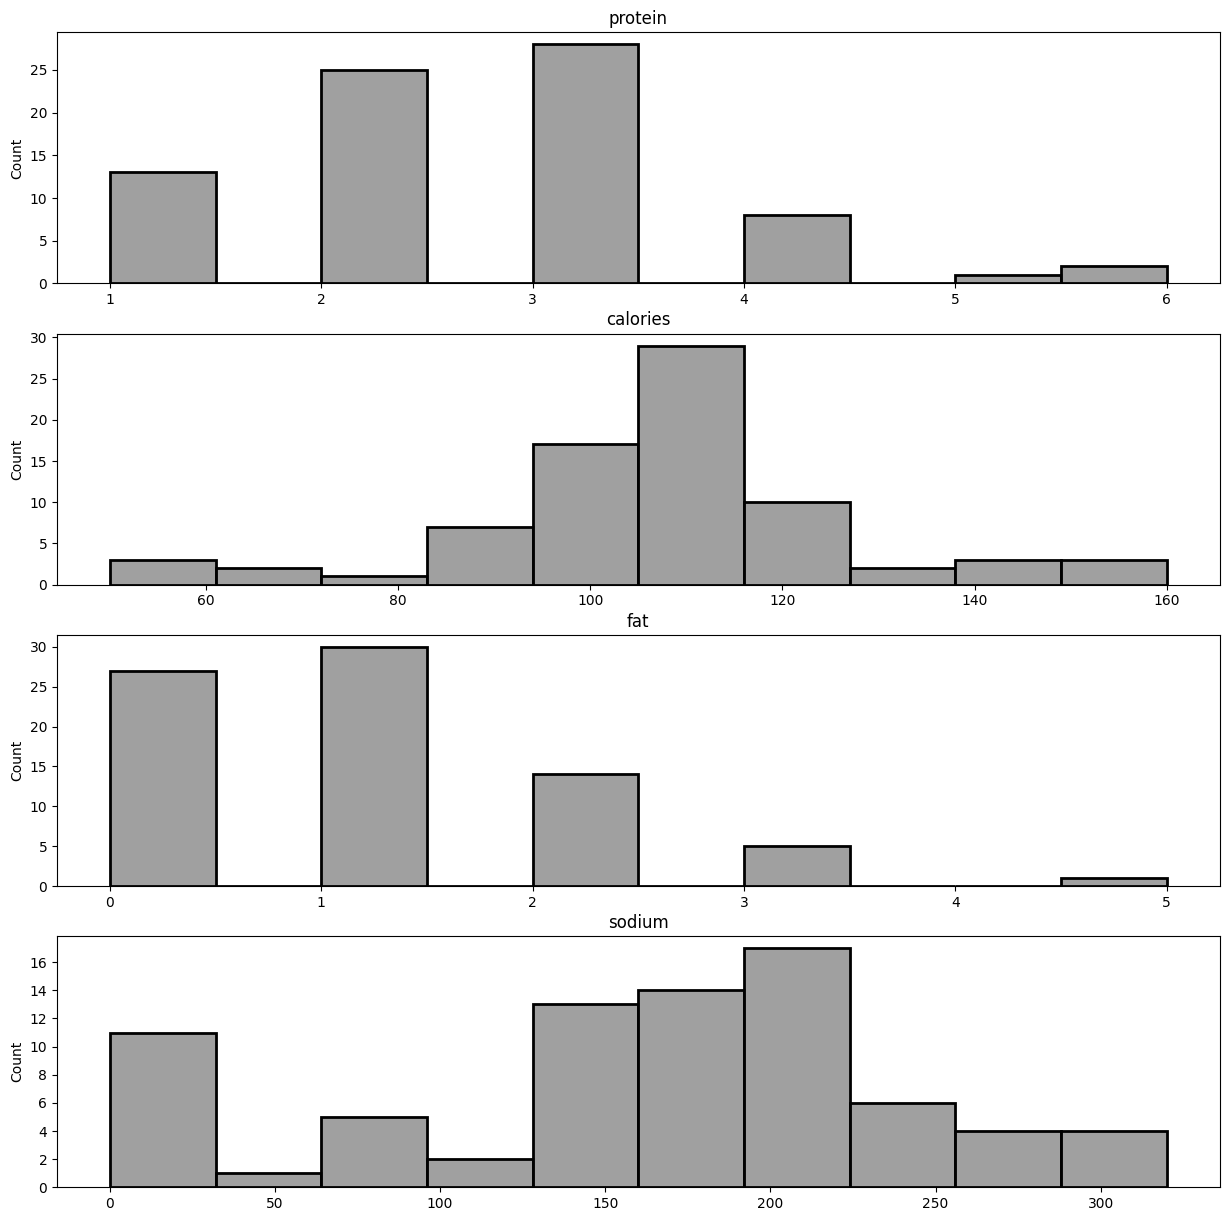

In [11]:
## Graficamos histograma para ver distribución de variables como gramos de proteinas, calorías por porción, gramos de grasa y miligramos de sodio:
hist_columns = ['protein','calories','fat','sodium']
fig, axes = plt.subplots(4,1, figsize=(15,15)) # ---> Matplotlib
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()
for col, ax in zip(cereals_df[hist_columns], axes):
  sns.histplot(x=cereals_df[col],color='grey', ax=ax, bins=10,palette="bright",linewidth=2) # ---> Seaborn
  ax.set(title=f'{col}', xlabel=None) # ---> Matplotlib

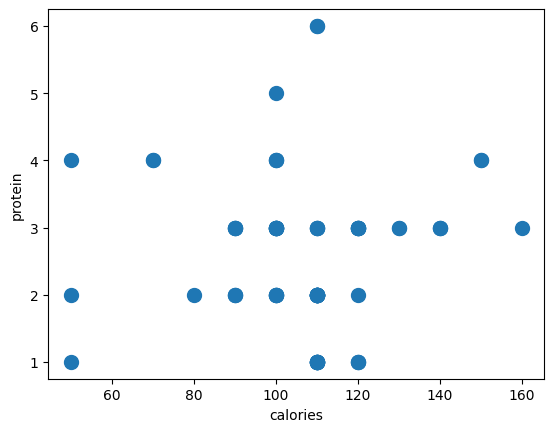

In [12]:
cereals_df.plot.scatter(x = 'calories', y = 'protein', s = 100);

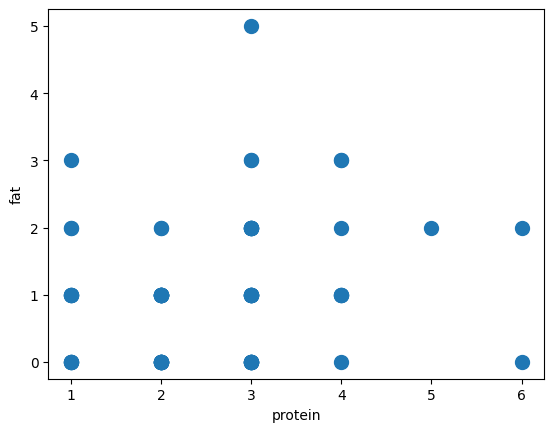

In [13]:
cereals_df.plot.scatter(x = 'protein', y = 'fat', s = 100);

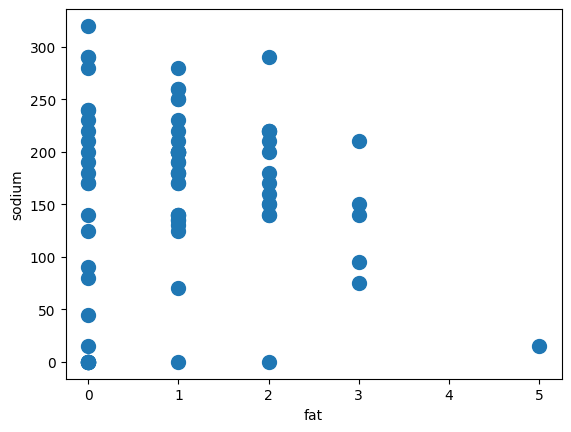

In [14]:
cereals_df.plot.scatter(x = 'fat', y = 'sodium', s = 100);

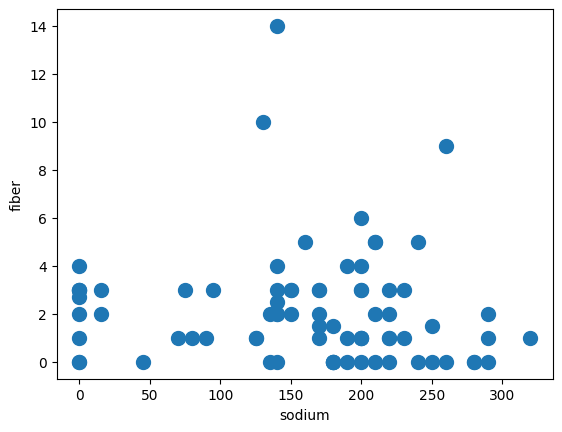

In [15]:
cereals_df.plot.scatter(x = 'sodium', y = 'fiber', s = 100);

<Axes: ylabel='sodium'>

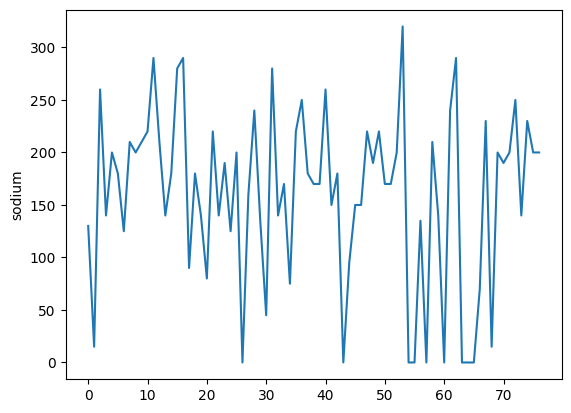

In [16]:
## Grafico de lineas para variable de miligramos de sodio
sns.lineplot(data=cereals_df['sodium'])

<Axes: ylabel='protein'>

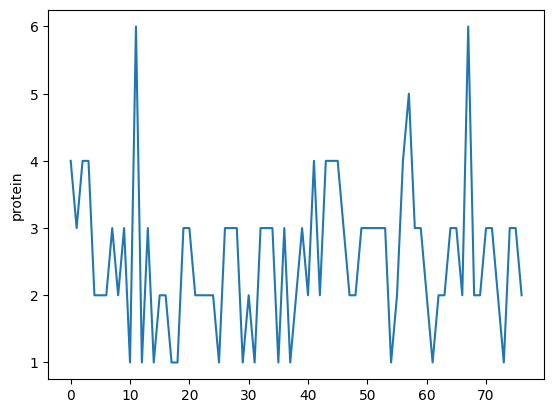

In [17]:
## Grafico de lineas para variable de gramos de proteinas
sns.lineplot(data=cereals_df['protein'])

<Axes: ylabel='fat'>

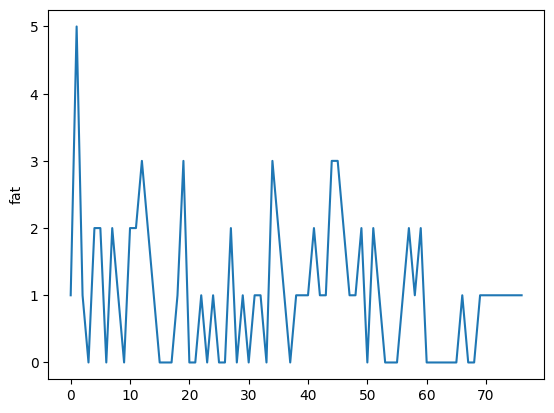

In [18]:
## Grafico de lineas para variable de gramos de grasa
sns.lineplot(data=cereals_df['fat'])

<Axes: ylabel='calories'>

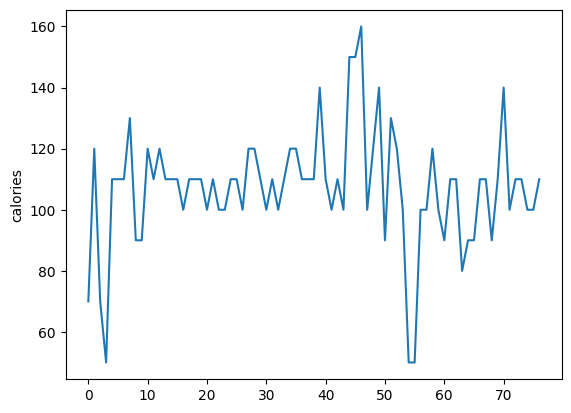

In [19]:
## Grafico de lineas para variable de calorías por porción
sns.lineplot(data=cereals_df['calories'])

Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico.

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

In [20]:
## Análisis descriptivo de recuentos únicos por categoría para la variable MFR:
cereals_df['mfr'].value_counts()

K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64

In [21]:
## Análisis descriptivo de recuentos únicos por categoría para la variable SHELF:
cereals_df['shelf'].value_counts()

3    36
2    21
1    20
Name: shelf, dtype: int64

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.

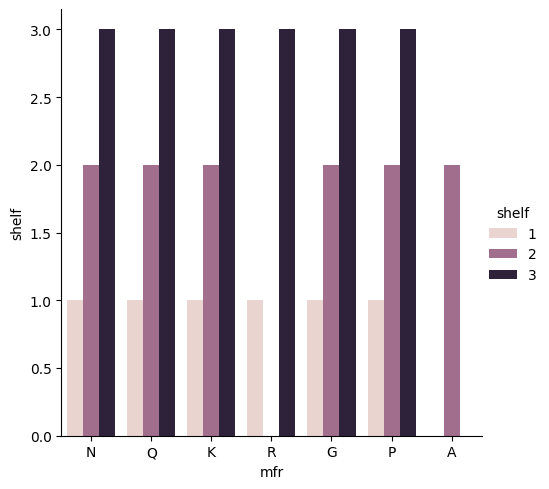

In [22]:
## Gráfico de barras para conocer la cantidad por cada fabricante de cereales en cada estante:
sns.catplot(x = "mfr", y = "shelf", kind = "bar", data = cereals_df, hue = "shelf");

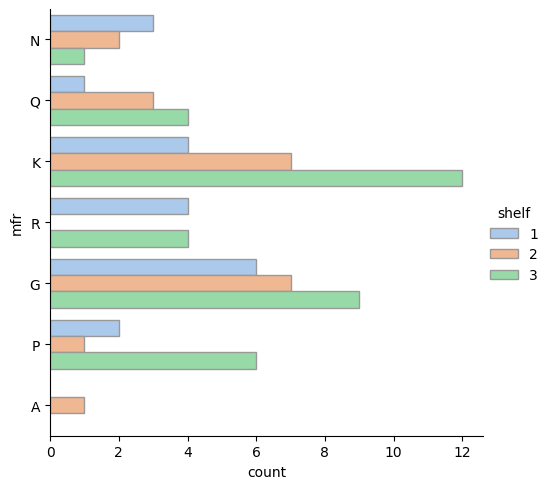

In [23]:
## Obtenemos la cantidad de registros por cada fabricante en cada estante:
sns.catplot(
    data=cereals_df, y="mfr", hue="shelf", kind="count",
    palette="pastel", edgecolor=".6",
)

 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

In [24]:
## Obtenemos el valor más frecuente para rating
from statistics import mode
mode(cereals_df['rating'])

68.402973

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?

In [25]:
cereals_df.sort_values('rating', ascending=False).head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.00,0.50,93.704912
64,Shredded_Wheat_'n'Bran,N,C,90,3,0,0,4.0,19.0,0.0,140.0,0,1,1.00,0.67,74.472949
65,Shredded_Wheat_spoon_size,N,C,90,3,0,0,3.0,20.0,0.0,120.0,0,1,1.00,0.67,72.801787
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.00,0.33,68.402973
63,Shredded_Wheat,N,C,80,2,0,0,3.0,16.0,0.0,95.0,0,1,0.83,1.00,68.235885
20,Cream_of_Wheat_(Quick),N,H,100,3,0,80,1.0,21.0,0.0,NaN,0,2,1.00,1.00,64.533816
55,Puffed_Wheat,Q,C,50,2,0,0,1.0,10.0,0.0,50.0,0,3,0.50,1.00,63.005645
54,Puffed_Rice,Q,C,50,1,0,0,0.0,13.0,0.0,15.0,0,3,0.50,1.00,60.756112
50,Nutri-grain_Wheat,K,C,90,3,0,170,3.0,18.0,2.0,90.0,25,3,1.00,1.00,59.642837
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.00,0.33,59.425505


Se muestran los 10 cereales con mejor evaluación, vemos que corresponden a los fabricantes K, N y Q, siendo el primero el del fabricante K.

4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots.

<Axes: xlabel='mfr', ylabel='calories'>

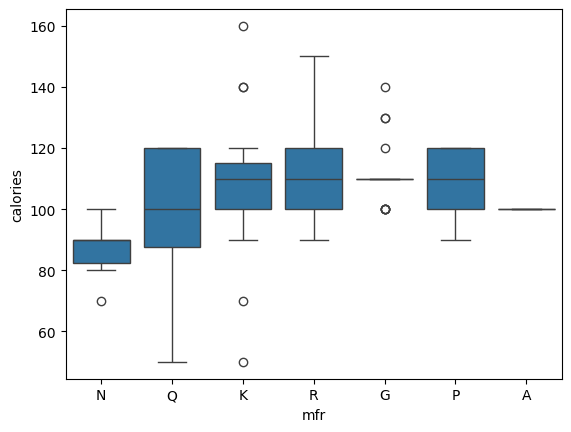

In [26]:
sns.boxplot(x='mfr', y='calories', data=cereals_df) # ---> Seaborn


*   Podemos ver que la distribución para el fabricante G tiene una mayor cantidad de valores atípicos del número de calorías respecto a los demás fabricantes.

*   El 50% del número de calorías está en el mismo rango para los fabricantes K, R y P.


4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`?

<Axes: >

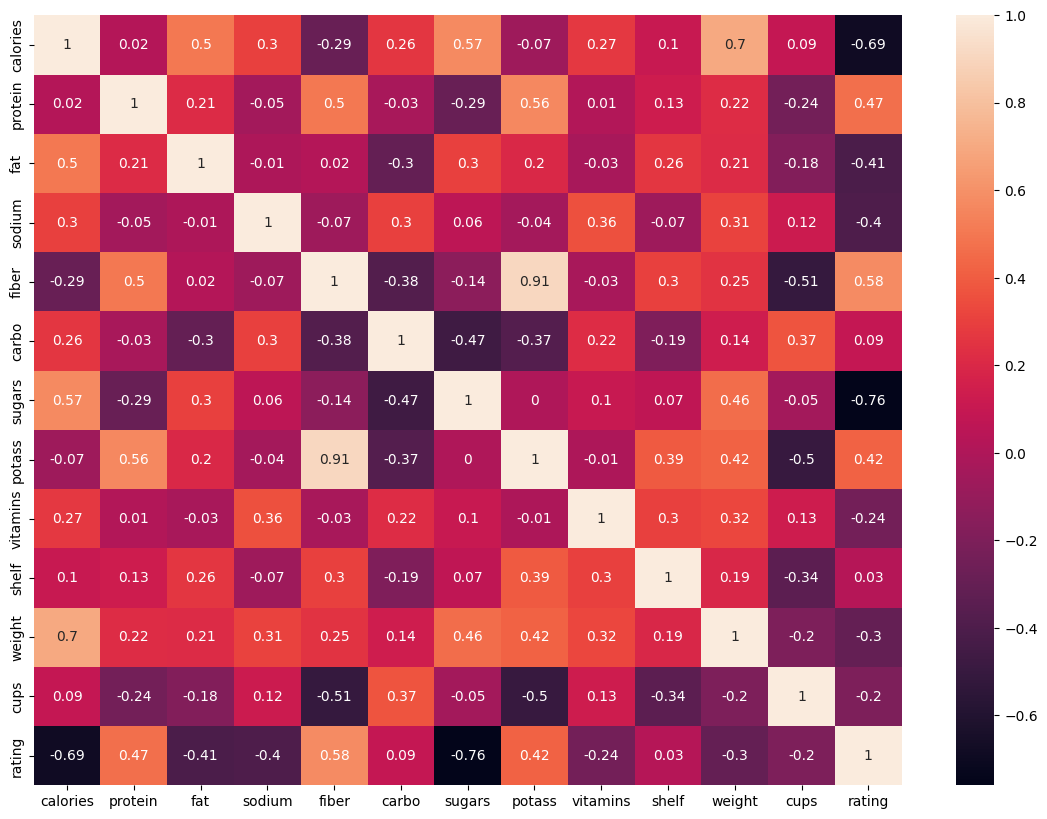

In [27]:
## Diagramamos mapa de calor para ver la correlación de las variables con rating
plt.figure(figsize = (14, 10))
sns.heatmap(round(cereals_df.corr(numeric_only=True),2), annot = True) # ---> Seaborn

La cantidad de gramos de proteínas y gramos de fibra dietética están más correlacionadas al valor de rating de cereal, lo que quiere decir que son las características más asociadas a la valoración del producto.

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos.

In [28]:
## Primero determinamos el porcentaje de valores faltantes para cada columna del dataframe
cant_obs = cereals_df.shape[0]
for col in cereals_df.columns:
  num_na = round((sum(cereals_df[col].isna())/cant_obs)*100,3)
  print('{}:{}'.format(col,num_na),'%')

name:0.0 %
mfr:0.0 %
type:0.0 %
calories:0.0 %
protein:0.0 %
fat:0.0 %
sodium:0.0 %
fiber:0.0 %
carbo:1.299 %
sugars:1.299 %
potass:2.597 %
vitamins:0.0 %
shelf:0.0 %
weight:0.0 %
cups:0.0 %
rating:0.0 %


In [29]:
## Eliminar registros con data faltante
cereals_df = cereals_df.dropna()
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [30]:
## Reiniciar índice para que quede de manera consecutiva
cereals_df = cereals_df.reset_index()
cereals_df

,index,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
70,73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
71,74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
72,75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

In [31]:
var_rating = cereals_df['rating']

In [32]:
cereals_df

,index,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
70,73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
71,74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
72,75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [50]:
## Calculamos predictores numéricos:
x = cereals_df.iloc[:,[4,5,6,7,8,9,10,11,12,14,15]]
## Separamos el objetivo en una variable
y = cereals_df['rating']

In [70]:
x

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,70,4,1,130,10.0,5.0,6.0,280.0,25,1.0,0.33
1,120,3,5,15,2.0,8.0,8.0,135.0,0,1.0,1.00
2,70,4,1,260,9.0,7.0,5.0,320.0,25,1.0,0.33
3,50,4,0,140,14.0,8.0,0.0,330.0,25,1.0,0.50
4,110,2,2,180,1.5,10.5,10.0,70.0,25,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...
69,110,2,1,250,0.0,21.0,3.0,60.0,25,1.0,0.75
70,110,1,1,140,0.0,13.0,12.0,25.0,25,1.0,1.00
71,100,3,1,230,3.0,17.0,3.0,115.0,25,1.0,0.67
72,100,3,1,200,3.0,17.0,3.0,110.0,25,1.0,1.00


In [52]:
## Escalamos valores de x
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
x_scaled = escalar.fit_transform(x)
x_scaled[0:5]


array([[-1.87865227,  1.3911796 ,  0.        , -0.39369182,  3.25070642,
        -2.51720557, -0.25594026,  2.57800107, -0.18308346, -0.20220332,
        -2.09989497],
       [ 0.65821393,  0.45529514,  4.        , -1.79257173, -0.0729865 ,
        -1.74106718,  0.2060007 ,  0.51828763, -1.31209813, -0.20220332,
         0.76191901],
       [-1.87865227,  1.3911796 ,  0.        ,  1.18765068,  2.8352448 ,
        -1.99977998, -0.48691074,  3.14619788, -0.18308346, -0.20220332,
        -2.09989497],
       [-2.89339875,  1.3911796 , -1.        , -0.27205009,  4.91255287,
        -1.74106718, -1.64176313,  3.28824708, -0.18308346, -0.20220332,
        -1.37376306],
       [ 0.15084069, -0.48058932,  1.        ,  0.21451684, -0.28071731,
        -1.0942852 ,  0.66794165, -0.40503219, -0.18308346, -0.20220332,
        -0.30592203]])

In [53]:
## Aplicación de PCA
from sklearn.decomposition import PCA
pca = PCA()
x_projected = pca.fit_transform(x_scaled)
x_projected = pd.DataFrame(x_projected)
x_projected.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,5.041308,2.470097,-0.054581,-1.129434,0.667588,0.640401,0.022399,0.059205,0.026325,0.250917,0.021692
1,1.503568,-0.310316,-3.014154,3.202758,1.344651,0.066992,-0.396573,-1.228817,-0.594837,0.042521,-0.096381
2,4.866598,1.946814,0.869813,-1.225550,0.358265,1.832924,-0.232872,0.017511,0.116766,-0.493001,-0.031211
3,5.468886,3.899001,1.883856,-1.628993,0.601691,0.374002,-0.811525,-1.003853,0.063792,0.720550,0.101563
4,0.088378,-0.391583,-1.490079,0.054716,0.331903,0.848360,0.271351,0.033091,-0.183945,0.169367,-0.050918


7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes.

In [74]:
total_col = x.shape[1]
for i in range(0, total_col):
  print("The percentage of variance explained by principal component", i+1, "is", format(pca.explained_variance_ratio_[i]*100,'.0f'),'%')

The percentage of variance explained by principal component 1 is 28 %
The percentage of variance explained by principal component 2 is 24 %
The percentage of variance explained by principal component 3 is 16 %
The percentage of variance explained by principal component 4 is 9 %
The percentage of variance explained by principal component 5 is 7 %
The percentage of variance explained by principal component 6 is 6 %
The percentage of variance explained by principal component 7 is 5 %
The percentage of variance explained by principal component 8 is 3 %
The percentage of variance explained by principal component 9 is 1 %
The percentage of variance explained by principal component 10 is 1 %
The percentage of variance explained by principal component 11 is 0 %


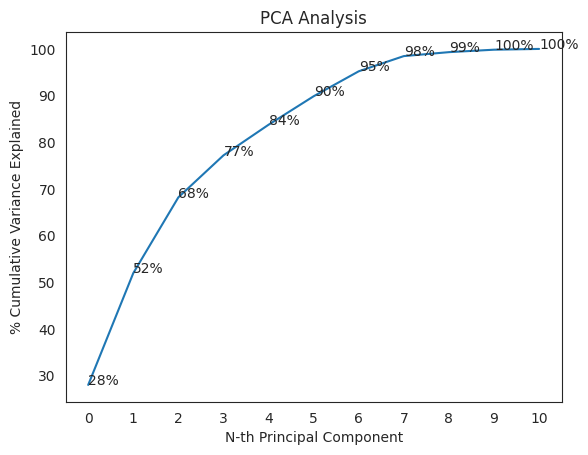

In [75]:
## Obtenemos curva de porcentaje de varianza acumulada

sns.set_style('white')

plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.title('PCA Analysis')
plt.xlabel('N-th Principal Component')
plt.ylabel('% Cumulative Variance Explained')
plt.xticks(np.arange(0,total_col,1))

labels = np.cumsum(pca.explained_variance_ratio_)*100
for i in range(total_col):
  plt.text(i,labels[i],str(format(labels[i],'.0f'))+'%')

Las variables que explican un porcentaje superior al 90% son : calories, protein, fat, sodium, fiber, carbo y sugars, explicando el 95% de la varianza total.

8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


In [77]:
# Select the number of components
num_components = 1
pc_df = pd.DataFrame(abs(pca.components_[:num_components]), columns = x.columns, index=['Principal component {}'.format(i) for i in range(1, num_components + 1)])
pc_df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
Principal component 1,0.010406,0.356782,0.190272,0.064721,0.499986,0.295779,0.058735,0.531454,0.037347,0.237423,0.388687


<ipython-input-79-39c36aa4d3c6>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=pc_df.iloc[0:1],ci=None)


Text(0, 0.5, 'Importancia de caracteristicas para componente principal')

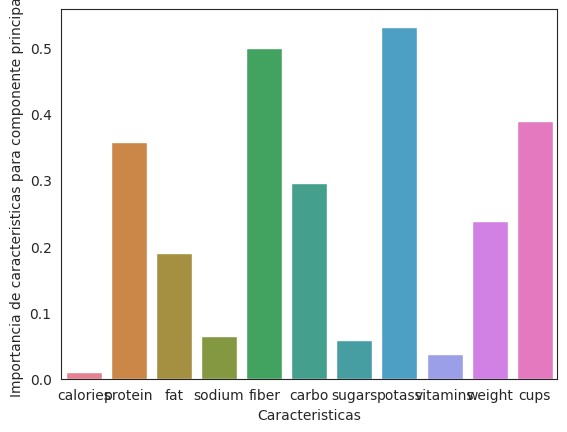

In [79]:
sns.barplot(data=pc_df.iloc[0:1],ci=None)
plt.xlabel('Caracteristicas')
plt.ylabel('Importancia de caracteristicas para componente principal')

Las tres variables que más contribuyen al componente principal son: fiber, cups y potass, siendo la variable potass la que más influye en el componente principal ya que posee un valor absoluto de 0.531454.

9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica.

In [86]:
## Para el ejemplo utilizaremos la variable categórica type, con la técnica de codificación one-hot

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
# transform data
result = encoder.fit_transform([cereals_df['type']])

## Imprimimmos el resultado
print(result)


  (0, 0)	1.0
  (0, 1)	1.0
  (0, 2)	1.0
  (0, 3)	1.0
  (0, 4)	1.0
  (0, 5)	1.0
  (0, 6)	1.0
  (0, 7)	1.0
  (0, 8)	1.0
  (0, 9)	1.0
  (0, 10)	1.0
  (0, 11)	1.0
  (0, 12)	1.0
  (0, 13)	1.0
  (0, 14)	1.0
  (0, 15)	1.0
  (0, 16)	1.0
  (0, 17)	1.0
  (0, 18)	1.0
  (0, 19)	1.0
  (0, 20)	1.0
  (0, 21)	1.0
  (0, 22)	1.0
  (0, 23)	1.0
  (0, 24)	1.0
  :	:
  (0, 49)	1.0
  (0, 50)	1.0
  (0, 51)	1.0
  (0, 52)	1.0
  (0, 53)	1.0
  (0, 54)	1.0
  (0, 55)	1.0
  (0, 56)	1.0
  (0, 57)	1.0
  (0, 58)	1.0
  (0, 59)	1.0
  (0, 60)	1.0
  (0, 61)	1.0
  (0, 62)	1.0
  (0, 63)	1.0
  (0, 64)	1.0
  (0, 65)	1.0
  (0, 66)	1.0
  (0, 67)	1.0
  (0, 68)	1.0
  (0, 69)	1.0
  (0, 70)	1.0
  (0, 71)	1.0
  (0, 72)	1.0
  (0, 73)	1.0


La técnica one hot trabaja correctamente con variables categóricas que no tienen un orden o jerarquía preestablecido, lo cual ocurre con la variable type que toma los valores cold y hot, sin tener una mayor relevancia uno del otro.

10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo.